## 平台相关的趋势分析

### gitee 每年日志数据数量、仓库数量、用户数量

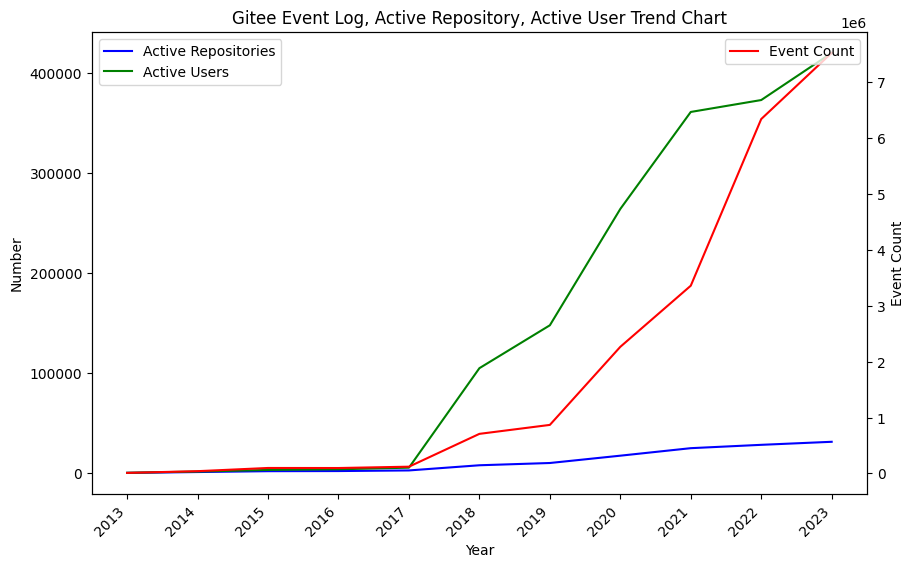

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_event_count = pd.read_csv('./data/gitee_eventcount.csv')
df_active_repositories = pd.read_csv('./data/gitee_repocount.csv')
df_active_users = pd.read_csv('./data/gitee_usercount.csv')

merged_df = pd.merge(df_active_repositories,
                     df_event_count, on='year', how='inner')
merged_df = pd.merge(merged_df, df_active_users, on='year', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(merged_df['year'], merged_df['active_repositories'],
         label='Active Repositories', color='blue')
ax1.plot(merged_df['year'], merged_df['active_users'],
         label='Active Users', color='green')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(merged_df['year'], merged_df['event_count'],
         label='Event Count', color='red')
ax2.set_ylabel('Event Count', color='black')
ax2.tick_params('y', colors='black')
ax2.legend(loc='upper right')

ax1.set_xticks(merged_df['year'])
ax1.set_xticklabels(merged_df['year'], rotation=45,
                    ha='right') 

plt.title('Gitee Event Log, Active Repository, Active User Trend Chart')

plt.show()

## Gitee Openrank趋势

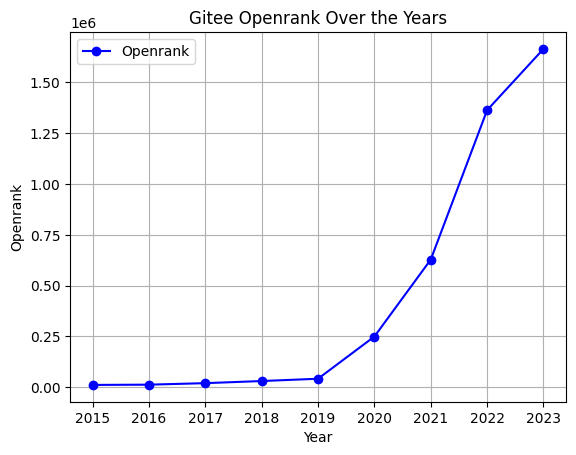

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/gitee_communityOpenrank.csv')

openrank = data['openrank']
year = data['year']

plt.plot(year, openrank, marker='o', linestyle='-',
         color='b', label='Openrank')

plt.title('Gitee Openrank Over the Years')
plt.xlabel('Year')
plt.ylabel('Openrank')

plt.grid(True)

plt.legend()

plt.show()

## Github Openrank 趋势

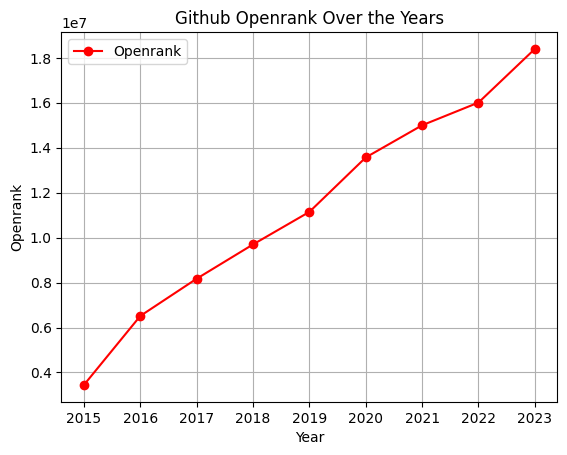

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/github_RepoOpenrankByYear.csv')

openrank = data['openrank']
year = data['year']

plt.plot(year, openrank, marker='o', linestyle='-',
         color='r', label='Openrank')

plt.title('Github Openrank Over the Years')
plt.xlabel('Year')
plt.ylabel('Openrank')

plt.grid(True)

plt.legend()

plt.show()

## Gitee 仓库 Openrank 排名Top20

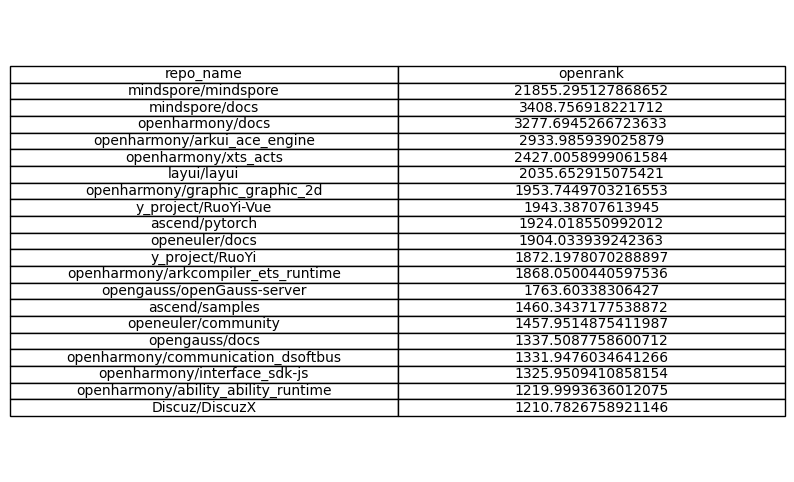

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/gitee_OpenrankByRepo.csv')

top_20_data = data.head(20)

top_20_data = top_20_data[['repo_name', 'openrank']]

fig, ax = plt.subplots(figsize=(10, 6))
table = ax.table(cellText=top_20_data.values,
                 colLabels=top_20_data.columns, cellLoc='center', loc='center')

ax.axis('off')

plt.show()

## Gitee 用户 Openrank 排名Top20

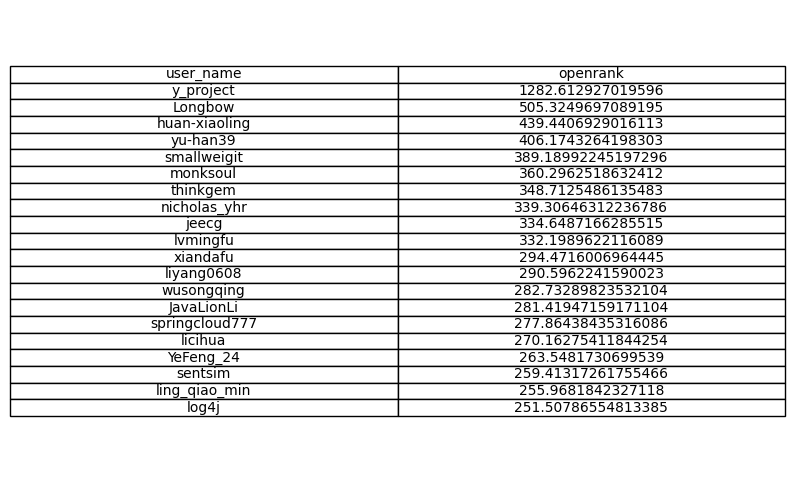

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('./data/gitee_OpenrankByUser.csv')

top_20_data = data.head(20)

top_20_data = top_20_data[['user_name', 'openrank']]

fig, ax = plt.subplots(figsize=(10, 6))
table = ax.table(cellText=top_20_data.values,
                 colLabels=top_20_data.columns, cellLoc='center', loc='center')

ax.axis('off')

plt.show()

## Gitee 和 Github 仓库及用户 Openrank 对比

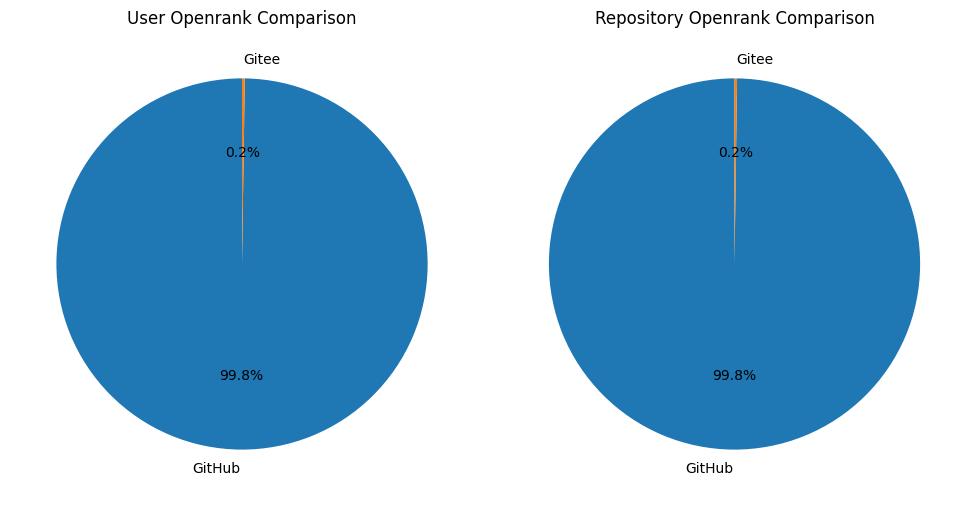

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


user_data = pd.read_csv('./data/user_Openrank.csv')  
repo_data = pd.read_csv('./data/repo_Openrank.csv')  

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].pie(user_data['openrank'], labels=user_data['platform'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('User Openrank Comparison')

axes[1].pie(repo_data['openrank'], labels=repo_data['platform'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Repository Openrank Comparison')

plt.tight_layout()

plt.show()

# 开源许可证方面的统计与分析

## 许可证数量分布

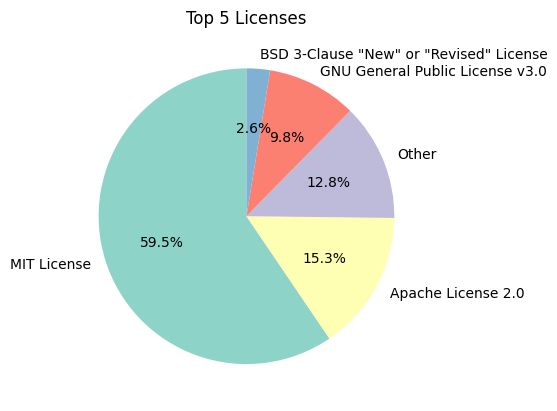

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/license_counts.csv')

top_10_license_counts = data.head(5)

plt.pie(top_10_license_counts['Count'], labels=top_10_license_counts['License'],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

plt.title('Top 5 Licenses')

plt.show()

## 许可证种类趋势

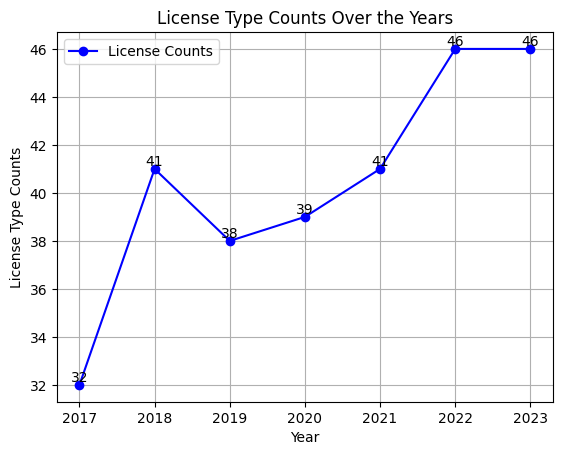

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/license_TypeCount.csv')

plt.plot(data['Year'], data['License_Counts'], marker='o', linestyle='-',
            color='b', label='License Counts')

for a, b in zip(data['Year'], data['License_Counts']):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=10)

plt.title('License Type Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('License Type Counts')

plt.grid(True)

plt.legend()

plt.show()

## 各类许可证数量趋势

### MIT License 趋势

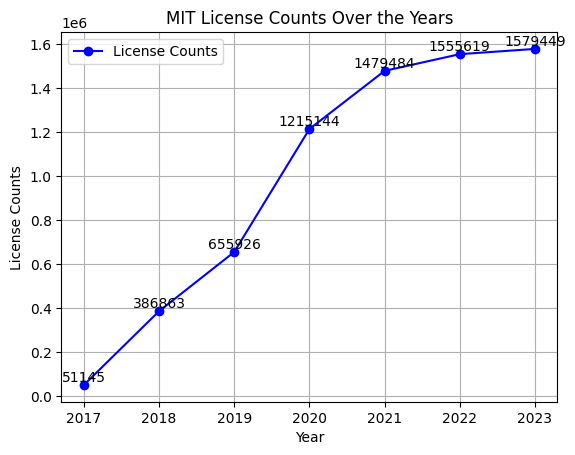

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/license_foryears.csv')

plt.plot(df.columns[1:], df.iloc[0, 1:], marker='o', linestyle='-',
         color='b', label='License Counts')

for a, b in zip(df.columns[1:], df.iloc[0, 1:]):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=10)

plt.title('MIT License Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('License Counts')

plt.grid(True)

plt.legend()

plt.show()

### 10个license的变化趋势图

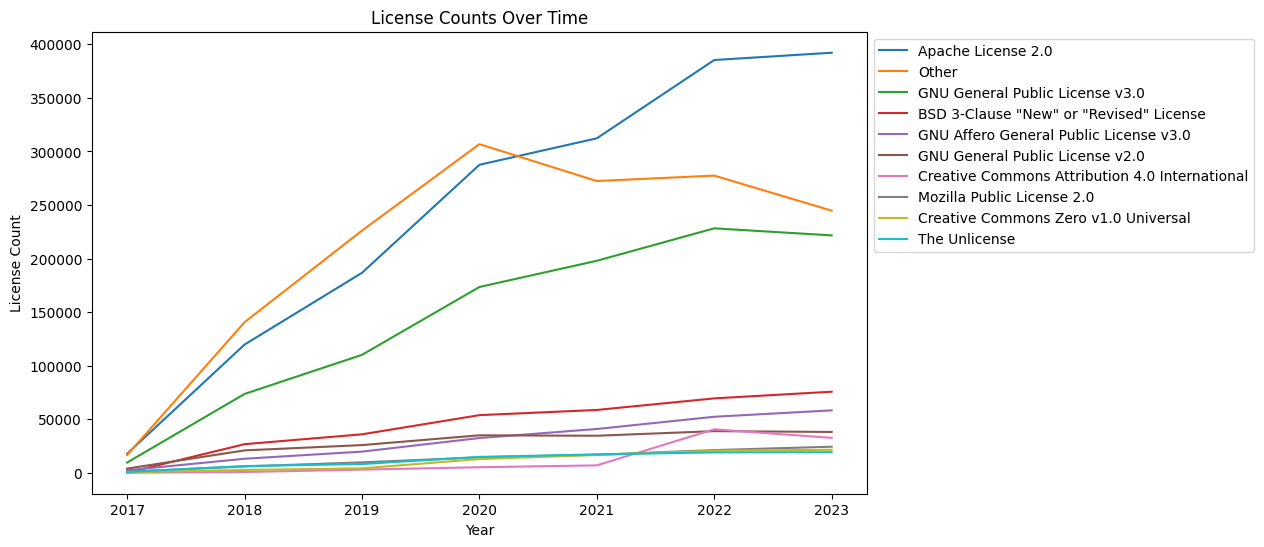

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('./data/license_foryears.csv')

df = df[df['2023'] != 0]
df = df.sort_values(by='2023', ascending=False)

df_drop1 = df.drop(0)
df_top10 = df_drop1.head(10)

df = df_top10

plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], label=row['License'])
    
plt.title('License Counts Over Time')
plt.xlabel('Year')
plt.ylabel('License Count')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## mulan 许可证变化趋势

## 许可证中最多的编程语言

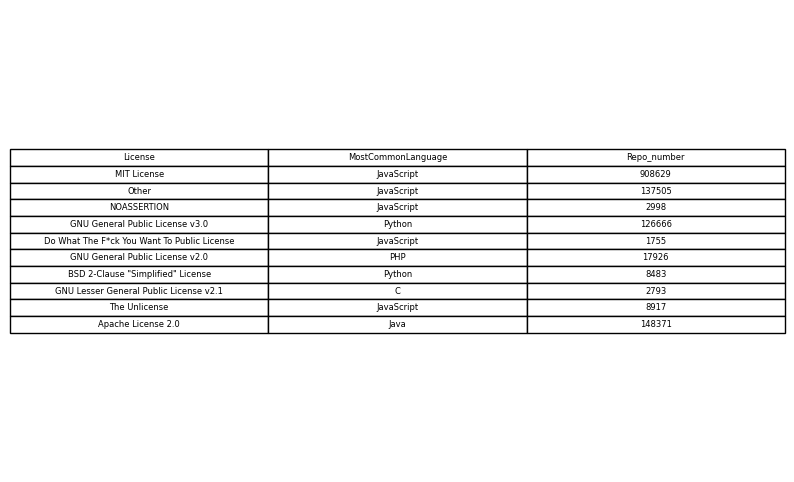

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/license_language_counts.csv')

top_10_data = data.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
table = ax.table(cellText=top_10_data.values,
                 colLabels=top_10_data.columns, cellLoc='center', loc='center')

ax.axis('off')

plt.show()